IMPORTING NECESSARY LIBRARIES

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge


import warnings
warnings.filterwarnings('ignore')

DATA PREPROCESSING

In [42]:
df = pd.read_csv("austin_weather.csv")
df.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [43]:
df.shape

(1319, 21)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [45]:
df.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [46]:
df.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

DATA CLEANING / IMPUTING VALUES

In [47]:
df = df.replace(to_replace=['-','T'], value= '')

In [48]:
df

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [49]:
 #Converted the datatype into numeric.
    
df[['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']] =  df[['DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent',
                                                                                                                                   'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 
                                                                                                                                   'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']].apply(pd.to_numeric)                    

In [50]:
df.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [51]:
# Total number of Null value per column

df.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

In [52]:
df.dropna(inplace=True)

In [53]:
#converting date into datetime

df['Date'] = pd.to_datetime(df['Date'])

In [54]:
df.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [55]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [56]:
df.drop(columns='Date',inplace = True)

EDA - EXPLORATORY DATA ANALYSIS

In [57]:
#Inspect the Data - identify non-numeric values

non_numeric_values = df['PrecipitationSumInches'].loc[~pd.to_numeric(df['PrecipitationSumInches'], errors='coerce').notnull()]
print(non_numeric_values)


Series([], Name: PrecipitationSumInches, dtype: float64)


In [58]:
#Handle Non-Numeric Values

df['PrecipitationSumInches'] = pd.to_numeric(df['PrecipitationSumInches'], errors='coerce')

<Axes: xlabel='Month'>

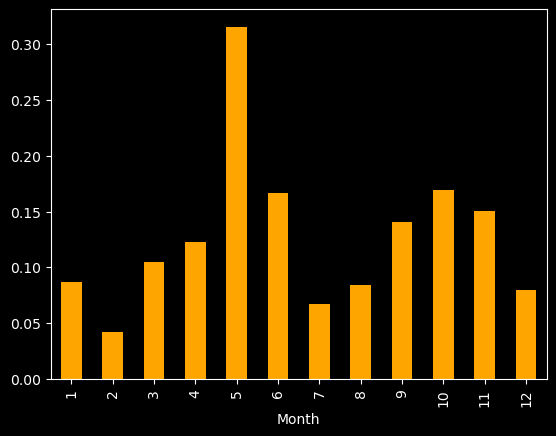

In [73]:
#Plot the mean precipitation for each month

plt.style.use('dark_background')
df.groupby('Month')['PrecipitationSumInches'].mean().plot(kind='bar', color='orange')


<Axes: xlabel='Month', ylabel='PrecipitationSumInches'>

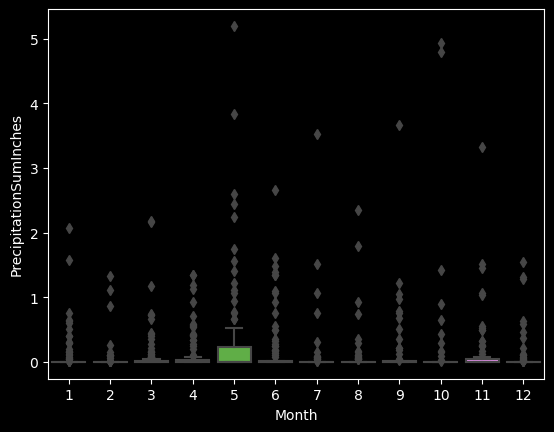

In [60]:
# Assuming 'Month' is a categorical variable and 'PrecipitationSumInches' is numeric

sb.boxplot(x=df['Month'], y=df['PrecipitationSumInches'])


TRAINING AND TESTING

In [61]:
X = df.drop(columns=['PrecipitationSumInches','Events','Year'])
y = df['PrecipitationSumInches']

# reshaping it into a 2-D vector
y = y.values.reshape(-1, 1)

In [62]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Initialize and train a model

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict the target variable on the test set

y_pred = regressor.predict(X_test)
print(y_pred)

[[ 0.24730079]
 [ 0.03355484]
 [-0.0209254 ]
 [ 0.05774798]
 [-0.139001  ]
 [-0.04875753]
 [-0.10861193]
 [ 0.10237896]
 [ 0.71869373]
 [-0.08894478]
 [-0.13130656]
 [-0.1356049 ]
 [-0.29977662]
 [ 0.04237695]
 [ 1.11943095]
 [ 0.26819554]
 [-0.1183411 ]
 [-0.14642397]
 [ 0.34786303]
 [ 0.0780793 ]
 [ 0.19593933]
 [ 0.0707203 ]
 [ 0.17883971]
 [ 0.25308217]
 [ 0.08030344]
 [ 0.3925434 ]
 [-0.00414399]
 [-0.01871683]
 [ 0.12603668]
 [ 0.61320167]
 [ 0.056229  ]
 [-0.16179056]
 [-0.180291  ]
 [ 0.09483413]
 [-0.06740375]
 [ 0.00379859]
 [-0.1099102 ]
 [-0.03328483]
 [ 0.16599277]
 [ 0.351353  ]
 [ 0.12776866]
 [ 0.24482738]
 [ 0.02322388]
 [-0.01299567]
 [-0.02259961]
 [-0.258601  ]
 [ 0.01188318]
 [ 0.33030861]
 [ 0.20118294]
 [ 0.13554509]
 [ 0.88347602]
 [ 0.17135681]
 [ 0.16785375]
 [ 0.05787954]
 [ 0.02056021]
 [-0.06501599]
 [ 0.52808453]
 [ 0.08653169]
 [-0.22177192]
 [ 0.44034048]
 [ 0.0653199 ]
 [-0.18960532]
 [ 0.10302929]
 [-0.21305911]
 [-0.01641653]
 [-0.09056602]
 [ 0.03930

EVALUATION METRICS

In [65]:
r2_score(y_test,y_pred)

0.4245371224938519

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.183991387135975
Mean Squared Error: 0.10947044385464892
Root Mean Squared Error: 0.3308631799621241


Comparing Actual and Predicted values 

In [67]:
weather = pd.DataFrame(data = (zip(y_test,y_pred)),columns=['Actual','Predicted'])
weather

,Actual,Predicted
0,[0.36],[0.24730079006423678]
1,[0.0],[0.033554842003798546]
2,[0.0],[-0.02092539707535801]
3,[0.0],[0.05774797522775987]
4,[0.0],[-0.13900100366006352]
...,...,...
232,[1.56],[0.5624155292036643]
233,[0.0],[0.04404660680453931]
234,[0.0],[-0.10779366170894389]
235,[0.0],[0.021783575754807716]


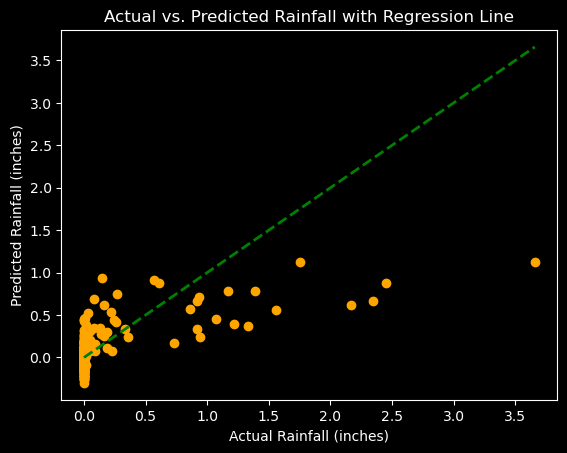

In [72]:

plt.scatter(y_test, y_pred, color = 'orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--g', linewidth=2)
plt.xlabel('Actual Rainfall (inches)')
plt.ylabel('Predicted Rainfall (inches)')
plt.title('Actual vs. Predicted Rainfall with Regression Line')
plt.show()

SKEWNESS

In [38]:
df.drop(columns='Events',inplace = True)

Skewness of Numeric Columns:
TempHighF                     -0.736426
TempAvgF                      -0.580629
TempLowF                      -0.522052
DewPointHighF                 -0.979523
DewPointAvgF                  -0.783056
DewPointLowF                  -0.610406
HumidityHighPercent           -1.505414
HumidityAvgPercent            -0.116816
HumidityLowPercent             0.594208
SeaLevelPressureHighInches     0.813078
SeaLevelPressureAvgInches      0.682466
SeaLevelPressureLowInches      0.480066
VisibilityHighMiles          -23.725457
VisibilityAvgMiles            -1.921580
VisibilityLowMiles            -0.635735
WindHighMPH                    0.708944
WindAvgMPH                     0.437519
WindGustMPH                    0.751720
PrecipitationSumInches         6.216006
Year                           0.135947
Month                          0.150936
dtype: float64


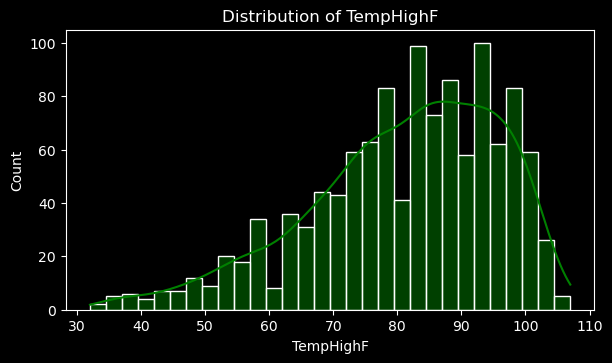

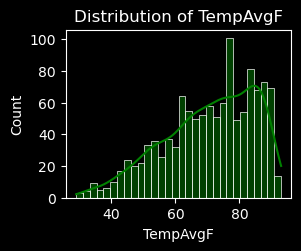

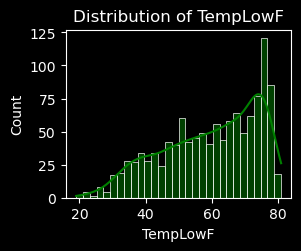

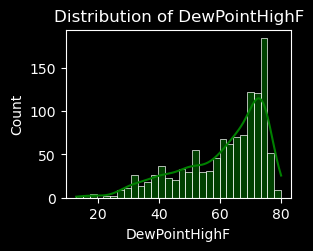

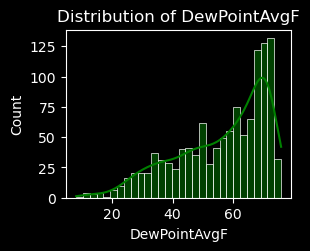

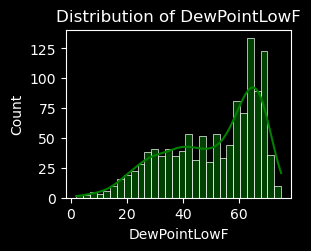

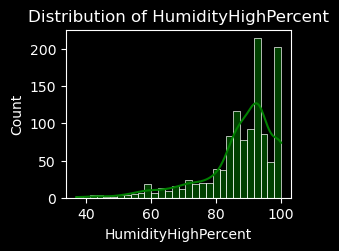

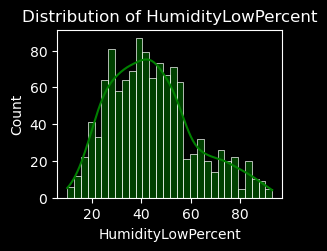

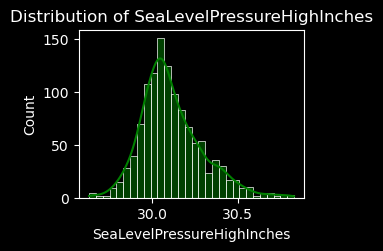

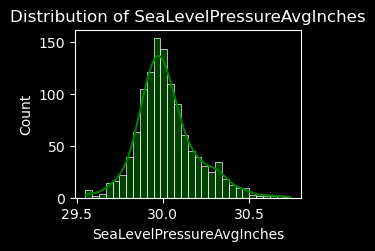

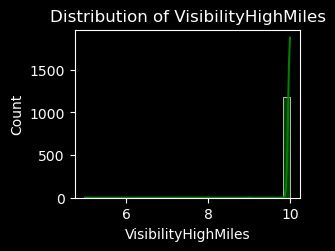

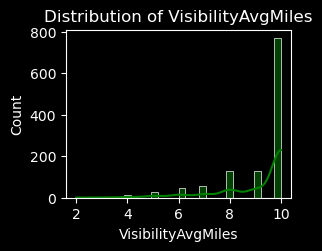

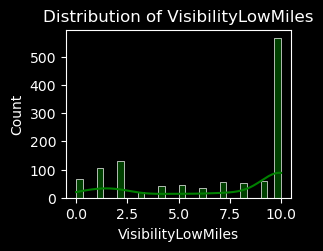

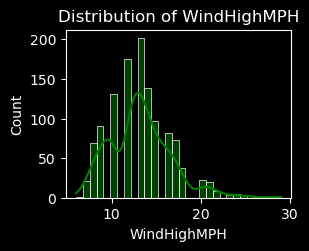

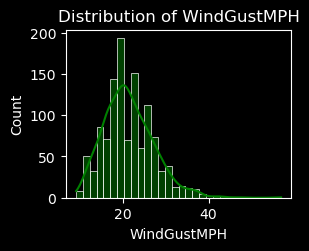

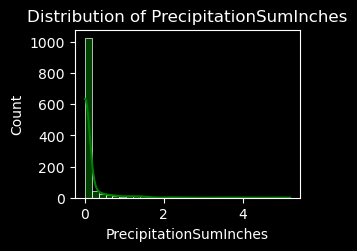

In [39]:
skewness = df.skew()
print("Skewness of Numeric Columns:")
print(skewness)

# Visualize the distribution 
skewed_columns = skewness[abs(skewness) > 0.5].index  # Select columns with skewness greater than 0.5

plt.figure(figsize=(15, 8))
for column in skewed_columns:
    plt.style.use('dark_background')
    plt.subplot(2, 2, 1)
    sb.histplot(df[column], kde=True, color='green', bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()


MODEL TUNING

In [42]:
ridge_regressor = Ridge(alpha=1.0)  #prevent overfitting
ridge_regressor.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_ridge = ridge_regressor.predict(X_test)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

print("\nTuned Model Evaluation:")
print(f'R-squared (Tuned Model): {r2_score_ridge}')



Tuned Model Evaluation:
R-squared (Tuned Model): 0.42464659792377824
